<a href="https://colab.research.google.com/github/Shoyebislam/Predicting_player_position/blob/main/11_22301365_22101051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier  # KNN Model
from sklearn.linear_model import LogisticRegression  # Logistic Regression Model
from sklearn.neural_network import MLPClassifier  # Neural Network Model
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE  # For handling class imbalance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#Load the dataset

In [ ]:
data = pd.read_csv("players_data_with_all_info.csv")
data.head(15)

,id,firstname,lastname,fullname,image_path,dateofbirth,gender,battingstyle,bowlingstyle,position,updated_at,continent_id,continent_name,country_id,country_name,country_image_path
0,2,Ahmed,Shehzad,Ahmed Shehzad,https://cdn.sportmonks.com/images/cricket/play...,23-11-1991,m,right-hand-bat,legbreak,Batsman,2020-03-31T05:00:31.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
1,3,Anwar,Ali,Anwar Ali,https://cdn.sportmonks.com/images/cricket/play...,25-11-1987,m,right-hand-bat,right-arm-fast-medium,Bowler,2020-12-14T18:58:56.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
2,4,Sarfraz,Ahmed,Sarfraz Ahmed,https://cdn.sportmonks.com/images/cricket/play...,22-05-1987,m,right-hand-bat,right-arm-offbreak,Wicketkeeper,2020-04-07T08:51:02.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
3,5,Azhar,Ali,Azhar Ali,https://cdn.sportmonks.com/images/cricket/play...,19-02-1985,m,right-hand-bat,legbreak,Batsman,2020-04-01T02:28:23.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
4,6,Fakhar,Zaman,Fakhar Zaman,https://cdn.sportmonks.com/images/cricket/play...,10-04-1990,m,left-hand-bat,slow-left-arm-orthodox,Batsman,2020-04-02T02:22:22.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
5,7,Imam,ul Haq,Imam ul Haq,https://cdn.sportmonks.com/images/cricket/play...,12-12-1995,m,left-hand-bat,NaN,Batsman,2020-04-02T09:00:48.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
6,8,Babar,Azam,Babar Azam,https://cdn.sportmonks.com/images/cricket/play...,15-10-1994,m,right-hand-bat,right-arm-offbreak,Batsman,2020-02-23T10:47:44.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
7,9,Asad,Shafiq,Asad Shafiq,https://cdn.sportmonks.com/images/cricket/play...,28-01-1986,m,right-hand-bat,right-arm-offbreak,Batsman,2020-03-31T15:33:50.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
8,10,Haris,Sohail,Haris Sohail,https://cdn.sportmonks.com/images/cricket/play...,09-01-1989,m,left-hand-bat,slow-left-arm-orthodox,Allrounder,2020-04-02T07:30:27.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...
9,11,Usman,Salahuddin,Usman Salahuddin,https://cdn.sportmonks.com/images/cricket/play...,02-12-1990,m,right-hand-bat,NaN,Batsman,2020-04-08T09:10:55.000000Z,2,Asia,52126,Pakistan,https://cdn.sportmonks.com/images/countries/pn...


#dataset description

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17385 entries, 0 to 17384
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  17385 non-null  int64 
 1   firstname           17385 non-null  object
 2   lastname            17385 non-null  object
 3   fullname            17385 non-null  object
 4   image_path          17385 non-null  object
 5   dateofbirth         17385 non-null  object
 6   gender              17385 non-null  object
 7   battingstyle        10063 non-null  object
 8   bowlingstyle        7883 non-null   object
 9   position            17385 non-null  object
 10  updated_at          17385 non-null  object
 11  continent_id        17385 non-null  int64 
 12  continent_name      17385 non-null  object
 13  country_id          17385 non-null  int64 
 14  country_name        17385 non-null  object
 15  country_image_path  17385 non-null  object
dtypes: int64(3), object(13

In [ ]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(f'There are {len(numerical_features)} numerical features: {numerical_features}')
print(f'There are {len(categorical_features)} categorical features: {categorical_features}')

There are 3 numerical features: ['id', 'continent_id', 'country_id']
There are 13 categorical features: ['firstname', 'lastname', 'fullname', 'image_path', 'dateofbirth', 'gender', 'battingstyle', 'bowlingstyle', 'position', 'updated_at', 'continent_name', 'country_name', 'country_image_path']


In [ ]:
data[numerical_features].describe()

,id,continent_id,country_id
count,17385.000000,17385.000000,1.738500e+04
mean,25211.165085,1.766753,7.592690e+05
std,15382.440803,0.982333,3.895557e+06
min,2.000000,1.000000,2.000000e+00
25%,11844.000000,1.000000,1.430000e+02
50%,25131.000000,2.000000,1.233000e+03
75%,38588.000000,2.000000,1.537320e+05
max,51878.000000,7.000000,2.415087e+07


In [ ]:
data[categorical_features].describe()

,firstname,lastname,fullname,image_path,dateofbirth,gender,battingstyle,bowlingstyle,position,updated_at,continent_name,country_name,country_image_path
count,17385,17385,17385,17385,17385,17385,10063,7883,17385,17385,17385,17385,17385
unique,7543,8059,16668,4104,6476,2,2,10,8,17385,6,90,89
top,Muhammad,Singh,Imran Khan,https://cdn.sportmonks.com/images/cricket/plac...,01-01-2001,m,right-hand-bat,right-arm-fast-medium,Bowler,2023-10-16T17:38:49.000000Z,Europe,India,https://cdn.sportmonks.com/images/countries/pn...
freq,260,546,11,13282,3380,16280,8300,3913,5711,1,8226,3179,3179


check duplicates

In [ ]:
data.nunique()

,0
id,17385
firstname,7543
lastname,8059
fullname,16668
image_path,4104
dateofbirth,6476
gender,2
battingstyle,2
bowlingstyle,10
position,8


In [ ]:
data.shape

(17385, 16)

In [ ]:
print("There are not any duplicate values in the dataset since each entries has an unique id")

There are not any duplicate values in the dataset since each entries has an unique id


Categorical Feature Analysis:

In [ ]:
data['gender'].value_counts()

,count
gender,
m,16280
f,1105


In [ ]:
data['battingstyle'].value_counts()

,count
battingstyle,
right-hand-bat,8300
left-hand-bat,1763


In [ ]:
#to understand the dataset features... whether they're binary classification or not...

In [ ]:
data['bowlingstyle'].value_counts()

,count
bowlingstyle,
right-arm-fast-medium,3913
right-arm-offbreak,1247
right-arm-fast,867
slow-left-arm-orthodox,713
left-arm-fast-medium,465
legbreak,346
legbreak-googly,201
left-arm-fast,107
slow-right-arm-orthodox,22


In [ ]:
data['bowlingstyle'].value_counts()

,count
bowlingstyle,
right-arm-fast-medium,3913
right-arm-offbreak,1247
right-arm-fast,867
slow-left-arm-orthodox,713
left-arm-fast-medium,465
legbreak,346
legbreak-googly,201
left-arm-fast,107
slow-right-arm-orthodox,22


#Correlation of all the feature

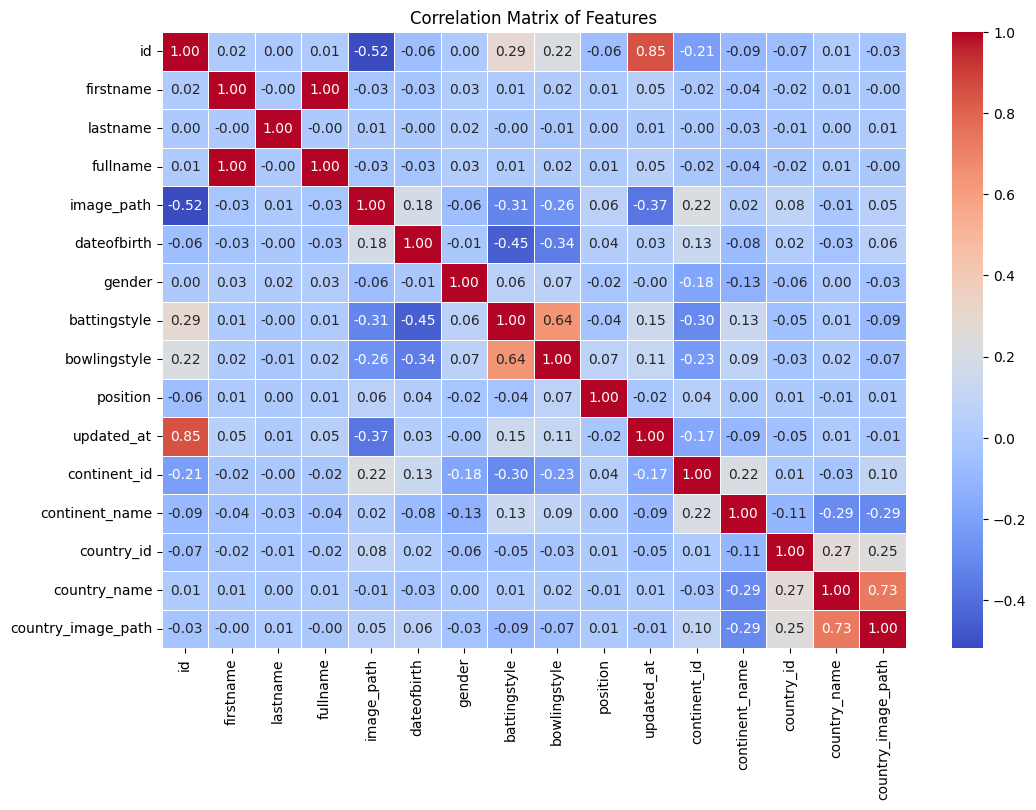

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns that need to be encoded
categorical_columns = ['firstname', 'lastname', 'fullname', 'image_path', 'dateofbirth', 'gender', 'battingstyle', 'bowlingstyle', 'position', 'updated_at', 'continent_name', 'country_name', 'country_image_path']
# categorical_columns = [ 'battingstyle', 'bowlingstyle', 'position'] #Abrar
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label Encoding for all categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


correlation_matrix = data.corr()

# Plot the heatmap to visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
correlation_matrix

,id,firstname,lastname,fullname,image_path,dateofbirth,gender,battingstyle,bowlingstyle,position,updated_at,continent_id,continent_name,country_id,country_name,country_image_path
id,1.000000,0.015318,0.002339,0.014840,-0.518371,-0.063132,0.002687,0.288510,0.220764,-0.062067,0.848190,-0.213023,-0.091134,-0.068868,0.011485,-0.031032
firstname,0.015318,1.000000,-0.001414,0.999674,-0.025806,-0.026715,0.028509,0.011322,0.018366,0.013052,0.048058,-0.017846,-0.042298,-0.018036,0.009136,-0.004164
lastname,0.002339,-0.001414,1.000000,-0.000363,0.007760,-0.004077,0.016942,-0.004460,-0.011466,0.004312,0.006642,-0.002522,-0.028666,-0.012465,0.000451,0.011039
fullname,0.014840,0.999674,-0.000363,1.000000,-0.025455,-0.026363,0.027787,0.010982,0.018156,0.013012,0.047533,-0.017194,-0.041916,-0.017004,0.009610,-0.003604
image_path,-0.518371,-0.025806,0.007760,-0.025455,1.000000,0.184583,-0.063243,-0.312710,-0.260734,0.062243,-0.371838,0.221284,0.018550,0.082001,-0.008393,0.048802
dateofbirth,-0.063132,-0.026715,-0.004077,-0.026363,0.184583,1.000000,-0.007833,-0.447240,-0.344754,0.038964,0.034273,0.134273,-0.077871,0.024689,-0.033807,0.058113
gender,0.002687,0.028509,0.016942,0.027787,-0.063243,-0.007833,1.000000,0.063762,0.068436,-0.022033,-0.004017,-0.181871,-0.126136,-0.057958,0.000143,-0.033819
battingstyle,0.288510,0.011322,-0.004460,0.010982,-0.312710,-0.447240,0.063762,1.000000,0.641340,-0.036989,0.150286,-0.298090,0.132921,-0.051377,0.012366,-0.090962
bowlingstyle,0.220764,0.018366,-0.011466,0.018156,-0.260734,-0.344754,0.068436,0.641340,1.000000,0.071741,0.113219,-0.233176,0.085229,-0.029271,0.016333,-0.065135
position,-0.062067,0.013052,0.004312,0.013012,0.062243,0.038964,-0.022033,-0.036989,0.071741,1.000000,-0.015787,0.040563,0.004978,0.007574,-0.007851,0.006654


#class imbalance

In [ ]:
data['position'].value_counts()

,count
position,
3,5711
1,4915
0,4877
7,1692
5,54
4,49
6,49
2,38


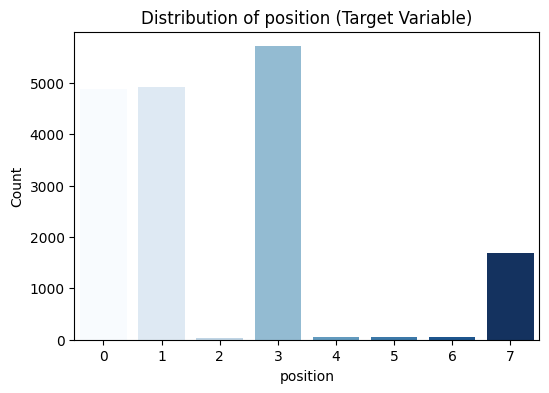

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='position', data=data, palette='Blues', hue='position', legend=False)
plt.title('Distribution of position (Target Variable)')
plt.xlabel('position')
plt.ylabel('Count')
plt.show()

#Dataset preprocessing

In [ ]:
#Checking missing Values
print(data.isnull().sum())

id                    0
firstname             0
lastname              0
fullname              0
image_path            0
dateofbirth           0
gender                0
battingstyle          0
bowlingstyle          0
position              0
updated_at            0
continent_id          0
continent_name        0
country_id            0
country_name          0
country_image_path    0
dtype: int64


In [ ]:
#Dropping columns
data = data.drop(['firstname', 'lastname', 'fullname','image_path','dateofbirth','updated_at','country_image_path'], axis = 1)
data.shape

(17385, 9)

In [ ]:
data.head()

,id,gender,battingstyle,bowlingstyle,position,continent_id,continent_name,country_id,country_name
0,2,1,1,3,1,2,1,52126,56
1,3,1,1,6,3,2,1,52126,56
2,4,1,1,7,7,2,1,52126,56
3,5,1,1,3,1,2,1,52126,56
4,6,1,0,8,1,2,1,52126,56


#Feature Scaling of relevant features

In [ ]:
# scaling relevant features, I ignored other features because they are very irreleveant to predict 'position' values
features = data[['id','continent_id','country_id','battingstyle', 'bowlingstyle']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
data[['scaled_id','scaled_continent_id','scaled_country_id', 'scaled_battingstyle', 'scaled_bowlingstyle']] = scaled_features
print('Scaled updated dataset')
data.head(10)

Scaled updated dataset


,id,gender,battingstyle,bowlingstyle,position,continent_id,continent_name,country_id,country_name,scaled_id,scaled_continent_id,scaled_country_id,scaled_battingstyle,scaled_bowlingstyle
0,2,1,1,3,1,2,1,52126,56,-1.638875,0.237449,-0.181531,-0.493203,-2.151765
1,3,1,1,6,3,2,1,52126,56,-1.638809,0.237449,-0.181531,-0.493203,-0.879196
2,4,1,1,7,7,2,1,52126,56,-1.638744,0.237449,-0.181531,-0.493203,-0.455006
3,5,1,1,3,1,2,1,52126,56,-1.638679,0.237449,-0.181531,-0.493203,-2.151765
4,6,1,0,8,1,2,1,52126,56,-1.638614,0.237449,-0.181531,-2.035628,-0.030817
5,7,1,0,10,1,2,1,52126,56,-1.638549,0.237449,-0.181531,-2.035628,0.817562
6,8,1,1,7,1,2,1,52126,56,-1.638484,0.237449,-0.181531,-0.493203,-0.455006
7,9,1,1,7,1,2,1,52126,56,-1.638419,0.237449,-0.181531,-0.493203,-0.455006
8,10,1,0,8,0,2,1,52126,56,-1.638354,0.237449,-0.181531,-2.035628,-0.030817
9,11,1,1,10,1,2,1,52126,56,-1.638289,0.237449,-0.181531,-0.493203,0.817562


## Splitting Train and Test data

In [ ]:
X = data.drop(columns=['id', 'position']) #wont include id in train,test
y = pd.DataFrame(data['position'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
print("Training data shape:", X_train.shape,',',y_train.shape)
print("Testing data shape:", X_test.shape,',',y_test.shape)
print("KNN Accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred_knn = knn.predict(X_test)

Training data shape: (13038, 12) , (13038, 1)
Testing data shape: (4347, 12) , (4347, 1)
KNN Accuracy: 0.37


##handling class imbalance

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

##KNN Model

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.37


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN ROC-AUC: 0.5869786705079922


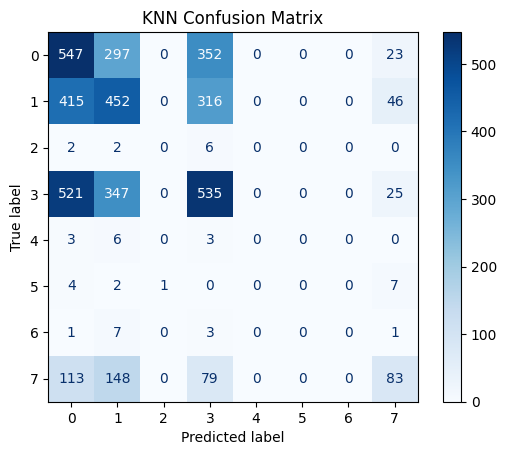

<ipython-input-27-c506273fb992>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray")


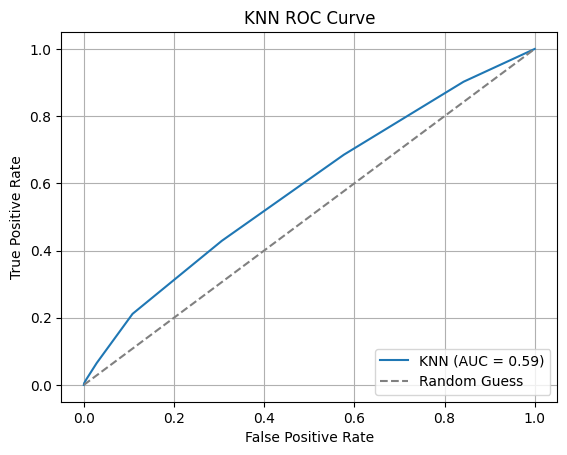

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("KNN Accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred_knn = knn.predict(X_test)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn) #later used for comparison

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')
ConfusionMatrixDisplay(conf_matrix_knn, display_labels=knn.classes_).plot(cmap="Blues")
print("KNN ROC-AUC:", roc_auc_knn)
plt.title("KNN Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="KNN (AUC = {:.2f})".format(roc_auc_knn))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy: 0.12
Logistic Regression ROC-AUC: 0.5730407334860069


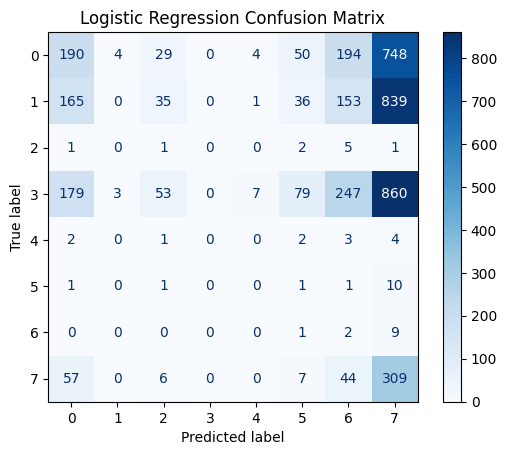

<ipython-input-28-9d7dd14d9182>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray")


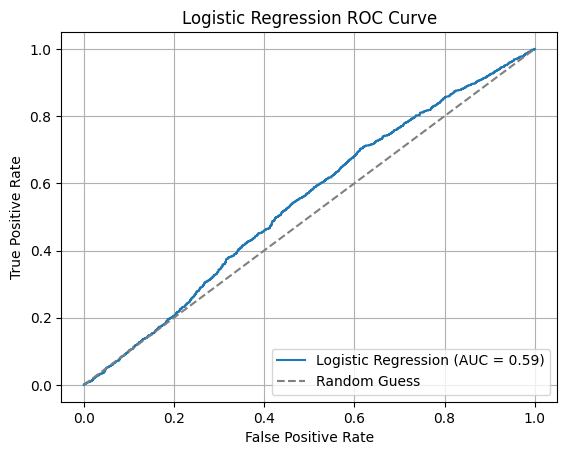

In [ ]:
log_reg = LogisticRegression(max_iter=200, solver='lbfgs', class_weight='balanced')

log_reg.fit(X_train, y_train)
print("LR Accuracy: {:.2f}".format(log_reg.score(X_test, y_test)))
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

ConfusionMatrixDisplay(conf_matrix_log_reg, display_labels=log_reg.classes_).plot(cmap="Blues")
print("Logistic Regression ROC-AUC:", roc_auc_log_reg)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_knn))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

##Neural Network

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NN Accuracy: 0.30
Neural Network ROC-AUC: 0.5287613483454308


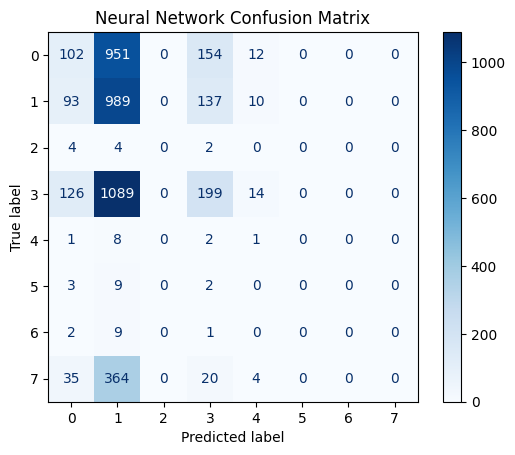

<ipython-input-29-4726db46d533>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray")


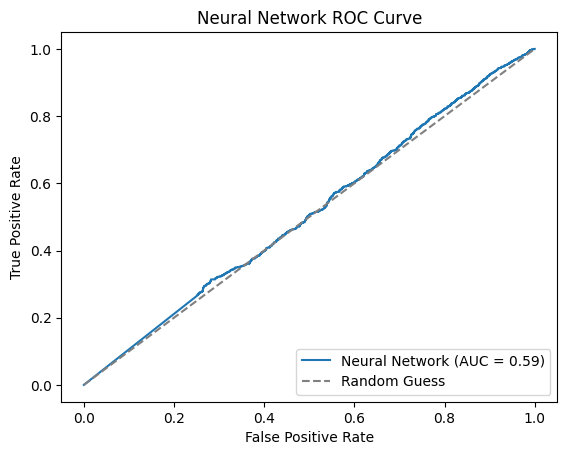

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=0)
nn_model.fit(X_train, y_train)
print("NN Accuracy: {:.2f}".format(nn_model.score(X_test, y_test)))
y_pred_nn = nn_model.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, nn_model.predict_proba(X_test), multi_class='ovr')
ConfusionMatrixDisplay(conf_matrix_nn, display_labels=nn_model.classes_).plot(cmap="Blues")
print("Neural Network ROC-AUC:", roc_auc_nn)
plt.title("Neural Network Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, nn_model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="Neural Network (AUC = {:.2f})".format(roc_auc_knn))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Neural Network ROC Curve")
plt.legend(loc="lower right")
plt.show()

##Metric Evaluation

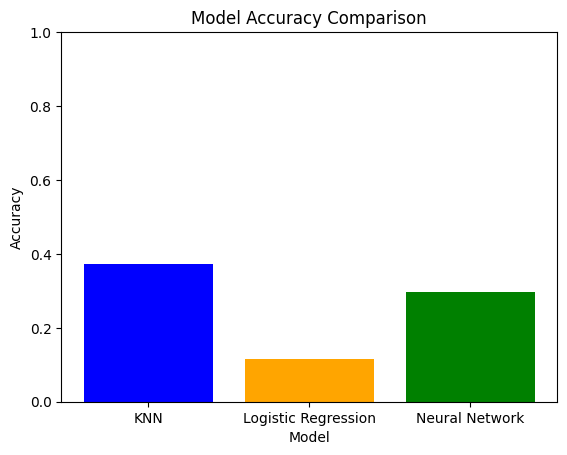

In [ ]:
models = ['KNN', 'Logistic Regression', 'Neural Network']
accuracies = [accuracy_knn, accuracy_log_reg, accuracy_nn]

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.show()